In [1]:
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('Advertising.csv')

In [38]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


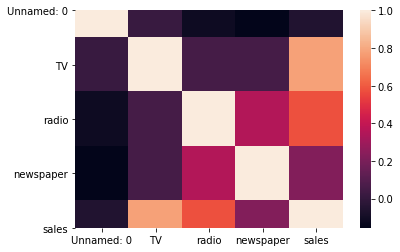

In [5]:
sns.heatmap(data.corr())

In [6]:
data.shape

(200, 5)

In [7]:
import matplotlib.pyplot as plt

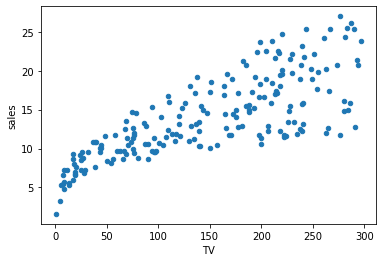

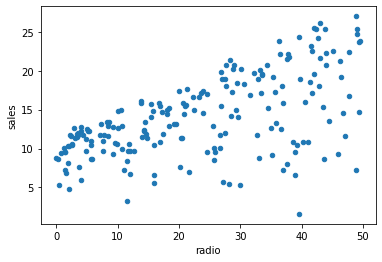

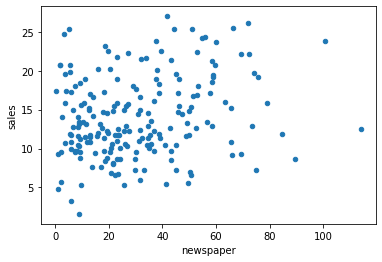

In [8]:
data.plot(kind='scatter',x='TV',y='sales')
data.plot(kind='scatter',x='radio',y='sales')
data.plot(kind='scatter',x='newspaper',y='sales')

In [9]:
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [10]:
import sklearn

In [11]:
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [12]:
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [13]:
lm.predict(X_new)

array([9.40942557])

In [14]:
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [15]:
lm.predict(X_new)

array([ 7.0658692 , 21.12245377])

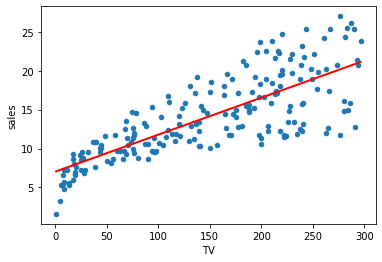

In [16]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, lm.predict(X_new), c='red', linewidth=2)

In [18]:
lm.score(X,y)

0.611875050850071

# mutiple linear regression

In [21]:
feature = ['TV','radio','newspaper']
x_axis = data[feature]
y_axis = data['sales']
lr = LinearRegression()
lr.fit(x_axis,y_axis)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(lr.coef_)
print(lr.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.9388893694594085


In [23]:
lr.score(x_axis,y_axis)

0.8972106381789521

In [24]:
X_AXIS = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()],'radio':[data.radio.min(),data.radio.max()],'newspaper':[data.newspaper.min(),data.newspaper.max()]})
X_AXIS.head()

,TV,radio,newspaper
0,0.7,0.0,0.3
1,296.4,49.6,114.0


In [25]:
lr.predict(X_AXIS)

array([ 2.97061337, 25.73634491])

In [30]:
from sklearn.feature_selection import f_regression

In [31]:
f_regression(x_axis,y_axis)

(array([312.14499437,  98.42158757,  10.88729908]),
 array([1.46738970e-42, 4.35496600e-19, 1.14819587e-03]))

In [32]:
p_values = f_regression(x_axis,y_axis)[1]

In [33]:
print(p_values)

[1.46738970e-42 4.35496600e-19 1.14819587e-03]


In [39]:
print(p_values.round(3))

[0.    0.    0.001]


# standarization
#used for standarization of data (x-meu)/standard_devaition

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
scaler.fit(x_axis)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
x_scaled = scaler.transform(x_axis)

In [49]:
x_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [50]:
new_reg = LinearRegression()

In [51]:
new_reg.fit(x_scaled,y_axis)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
new_reg.coef_

array([ 3.91925365,  2.79206274, -0.02253861])

In [53]:
new_reg.intercept_

14.0225

In [55]:
new_data = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()],'radio':[data.radio.min(),data.radio.max()],'newspaper':[data.newspaper.min(),data.newspaper.max()]})
new_data.head()

,TV,radio,newspaper
0,0.7,0.0,0.3
1,296.4,49.6,114.0


In [56]:
new_reg.predict(new_data)

array([  16.75921598, 1311.60619396])

In [57]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.70882347, -1.57086811, -1.39264649],
       [ 1.74402926,  1.77830048,  3.84117072]])

In [59]:
new_reg.predict(new_data_scaled)

array([ 2.97061337, 25.73634491])